<a href="https://colab.research.google.com/github/TSUParticleModelingGroup/DEFall2020/blob/master/LeapFrog3Body3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

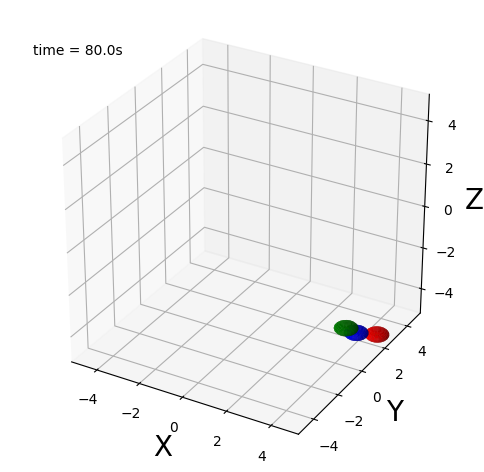

In [ ]:
import math
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import mpl_toolkits.mplot3d as plt3d

xmin = -5
xmax = 5
ymin = -5
ymax = 5
zmin = -5
zmax = 5

# Setting up the viewing window
fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(6, 6)
ax = plt.axes(projection='3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('Z', fontsize=20)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_zlim(zmin, zmax)

# Setting initial positions and velocities
x = [1.0, 0.0, -1.0]
y = [0.0, 1.0, 0.0]
z = [0.0, 0.5, 0.0]
vx = [4.0, 4.0, 4.0]
vy = [3.0, 3.0, 3.0]
vz = [0.0, 0.0, 2.0]

# Setting your time values
tStart = 0
tDuration = 80.0
tStop = tStart + tDuration
dt = 0.05
numberOfTimeSteps = int((tStop - tStart)/dt)

# Setting Masses, Spring strengths, natural lengths, air damping and gravity
L = 1.0
K = 30.0
C = [0.4, 0.4, 0.4]
M = [10.0, 10.0, 10.0]
G = 20.0

# Creating spheres 
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:20j]
radius = 0.5
sphereX = np.cos(u)*np.sin(v)*radius
sphereY = np.sin(u)*np.sin(v)*radius
sphereZ = np.cos(v)*radius*radius
ball1 = ax.plot_surface(sphereX + x[0], sphereY + y[0], sphereZ + z[0], color="r")
ball2 = ax.plot_surface(sphereX + x[1], sphereY + y[1], sphereZ + z[1], color="g")
ball3 = ax.plot_surface(sphereX + x[2], sphereY + y[2], sphereZ + z[2], color="b")

# Creating line to connect the spheres
line1 = plt3d.art3d.Line3D((x[0], x[1]), (y[0], y[1]), (z[0], z[1]), color = 'y')
line2 = plt3d.art3d.Line3D((x[1], x[2]), (y[1], y[2]), (z[1], z[2]), color = 'y')
line3 = plt3d.art3d.Line3D((x[2], x[0]), (y[2], y[0]), (z[2], z[0]), color = 'y')
lineObject1 = ax.add_line(line1)
lineObject2 = ax.add_line(line2)
lineObject3 = ax.add_line(line3)

# Creating the time text to put in the window
time_template = 'time = %.1fs'
time_text = ax.text2D(0.05, 0.9, '', transform=ax.transAxes)

def animate(iteration):
  global x, y, z, vx, vy, vz, K, L, C, M, G, ball1, ball2, ball3, lineObject1, lineObject2, lineObject3

  ball1.remove()
  ball2.remove()
  ball3.remove()
  lineObject1.remove()
  lineObject2.remove()
  lineObject3.remove()

  acx = [0.0, 0.0, 0.0]
  acy = [0.0, 0.0, 0.0]
  acz = [0.0, 0.0, 0.0]
  
  # Finding the force on body j caused by the springs connected to it. 
  # Where j will loop through 0, 1, 2.
  j = 0
  while(j < 3):
    # Finding the force on body j caused by the spring connecting body j to body k. 
    # Where k will loop through 0, 1, 2.
    k = 0
    while(k < 3):
      if(j != k): # != Means not equal. If j was equal to k you would be finding the force on body j caused by itself. 
                  # I know we all have internal conflicts but j should be take that up with its therapist not Google Colab.
        dx = x[k] - x[j]
        dy = y[k] - y[j]
        dz = z[k] - z[j]
        d = math.sqrt(dx*dx + dy*dy + dz*dz)
        Mag = K*(d - L)/M[j]
        acx[j] = acx[j] + Mag*(dx/d)
        acy[j] = acy[j] + Mag*(dy/d)
        acz[j] = acz[j] + Mag*(dz/d)
      k = k + 1
    j = j + 1

  # Adding on the air resistance and gravity (z is up and down)
  j = 0
  while(j < 3):
    acx[j] = acx[j] - C[j]*vx[j]/M[j]
    acy[j] = acy[j] - C[j]*vy[j]/M[j] 
    acz[j] = acz[j] - C[j]*vz[j]/M[j] - G/M[j]
    j = j + 1

  j = 0
  while(j < 3):
    # Updating the velocities
    if(iteration == 0): # Moving time up a half time step on the first iteration.
      vx[j] = vx[j] + acx[j]*dt/2.0
      vy[j] = vy[j] + acy[j]*dt/2.0
      vz[j] = vz[j] + acz[j]*dt/2.0
    else:
      vx[j] = vx[j] + acx[j]*dt
      vy[j] = vy[j] + acy[j]*dt
      vz[j] = vz[j] + acz[j]*dt

    # Updating the positions
    x[j] = x[j] + vx[j]*dt
    y[j] = y[j] + vy[j]*dt
    z[j] = z[j] + vz[j]*dt

    # Bounding off walls
    if(x[j] < xmin):
      x[j] = xmin + (xmin - x[j])
      vx[j] = -vx[j]
    if(xmax < x[j]):
      x[j] = xmax - (x[j] - xmax)
      vx[j] = -vx[j]

    if(y[j] < ymin):
      y[j] = ymin + (ymin - y[j])
      vy[j] = -vy[j]
    if(ymax < y[j]):
      y[j] = ymax - (y[j] - ymax)
      vy[j] = -vy[j]

    if(z[j] < zmin):
      z[j] = zmin + (zmin - z[j])
      vz[j] = -vz[j]
    if(zmax < z[j]):
      z[j] = zmax - (z[j] - zmax)
      vz[j] = -vz[j]

    j = j + 1
    
  ball1 = ax.plot_surface(sphereX + x[0], sphereY + y[0], sphereZ + z[0], color="r")
  ball2 = ax.plot_surface(sphereX + x[1], sphereY + y[1], sphereZ + z[1], color="g")
  ball3 = ax.plot_surface(sphereX + x[2], sphereY + y[2], sphereZ + z[2], color="b")
  line1 = plt3d.art3d.Line3D((x[0], x[1]), (y[0], y[1]), (z[0], z[1]), color = 'y')
  line2 = plt3d.art3d.Line3D((x[1], x[2]), (y[1], y[2]), (z[1], z[2]), color = 'y')
  line3 = plt3d.art3d.Line3D((x[2], x[0]), (y[2], y[0]), (z[2], z[0]), color = 'y')
  lineObject1 = ax.add_line(line1)
  lineObject2 = ax.add_line(line2)
  lineObject3 = ax.add_line(line3)
  time_text.set_text(time_template % (iteration*dt))
  return lineObject1, lineObject2, lineObject3, ball1, ball2, ball3, time_text

anim = animation.FuncAnimation(fig, animate, 
                               frames=numberOfTimeSteps, 
                               interval=20,
                               blit=True)

HTML(anim.to_html5_video())